In [3]:
import numpy as np; import pandas as pd; import pyodbc; import datetime; import sklearn; import os; import math
from sklearn.feature_selection import chi2, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%pylab inline 
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from IPython.core.display import display,HTML
display(HTML("<style>.container{width:90% !important;}</style>"))

Populating the interactive namespace from numpy and matplotlib


In [5]:
data = pd.read_csv('City.csv',sep=';')
data.head(7)

,CityID,QNT,AVGSUM,SUMSUM,AVGWeightGross,SUMWeightGross,PoSMS,Percen,Zoloto,Serebro,Sergi,Kolco,Podves,CEP,BRASLET
0,3,293,3421.5802,1002523.00,2.661160,779.720,0.000000,NaN,0.515358,0.361775,0.249147,0.266212,0.211604,0.112628,0.068259
1,108,518,3454.0275,1789186.26,2.478459,1283.842,0.000000,NaN,0.571429,0.295367,0.206564,0.247104,0.142857,0.171815,0.088803
2,85,609,3103.0623,1889765.00,2.630702,1602.098,0.000000,NaN,0.484401,0.364532,0.183908,0.256158,0.174056,0.129721,0.090312
3,125,449,4233.9198,1901030.00,2.421158,1087.100,0.000000,NaN,0.728285,0.167038,0.175947,0.273942,0.193764,0.133630,0.095768
4,52,824,3771.8316,3107989.30,2.703760,2227.899,0.000000,NaN,0.466019,0.423544,0.214806,0.275485,0.180825,0.134709,0.066748
5,82,1430,3421.0611,4892117.40,2.130087,3046.025,0.000000,NaN,0.474825,0.235664,0.237063,0.205594,0.170629,0.096503,0.062238
6,126,1981,3586.5526,7345259.88,1.881528,3853.370,0.233216,0.323745,0.788574,0.067383,0.201660,0.321289,0.145020,0.125977,0.050781


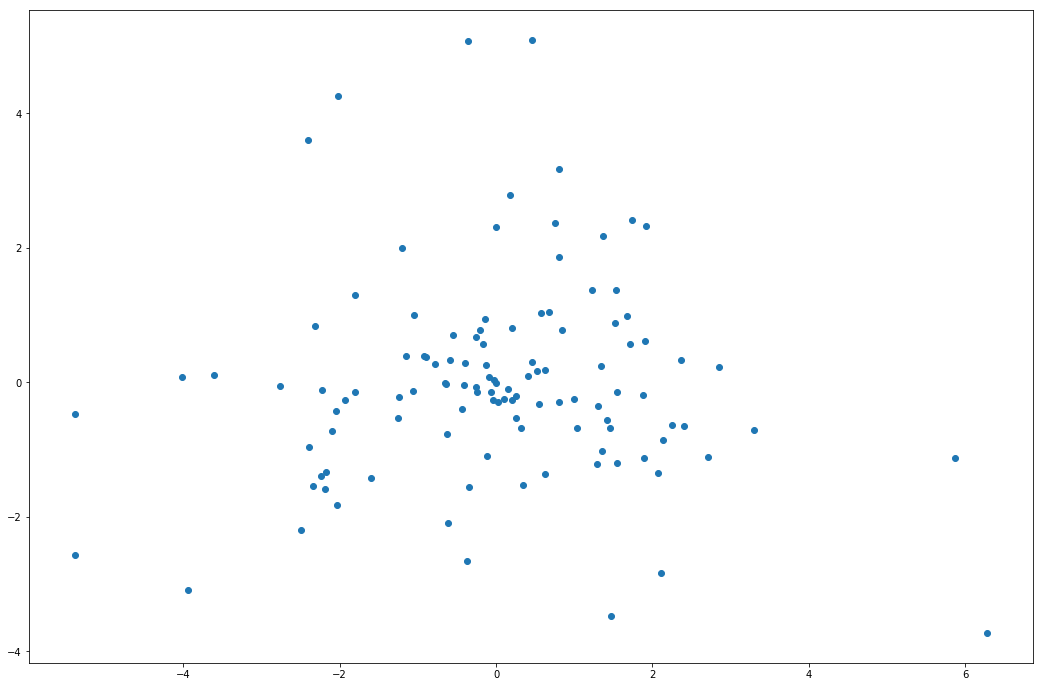

In [6]:
df = data.drop(['SUMSUM','SUMWeightGross','PoSMS','CityID'],axis=1).reset_index(drop=True).fillna(data['Percen'].median())

X = StandardScaler().fit_transform(df)

from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2) #HOW MANY AXIS DO WE WANT
pca.fit_transform(X)
targert2 = pca.transform(X)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 12

plt.scatter(targert2[:, 0], targert2[:, 1])

2018-10-17 14:23:56.025227
0.1709005756717841
0.1578487363523696
0.15566960182273093
0.16344451174472877
0.15956877069146497
0.12105732339980949
0.11884584640555304
0.1388589469706072
0.1266613548597327
0.12361982310544825
0.12344567367472559
0.1383833718201812
0.13987614299770673
0.13379584927642948
0.14369291644040788
0.14858569283933537
0.14711861595418638
0.14707350614575979
Wall time: 5min 8s


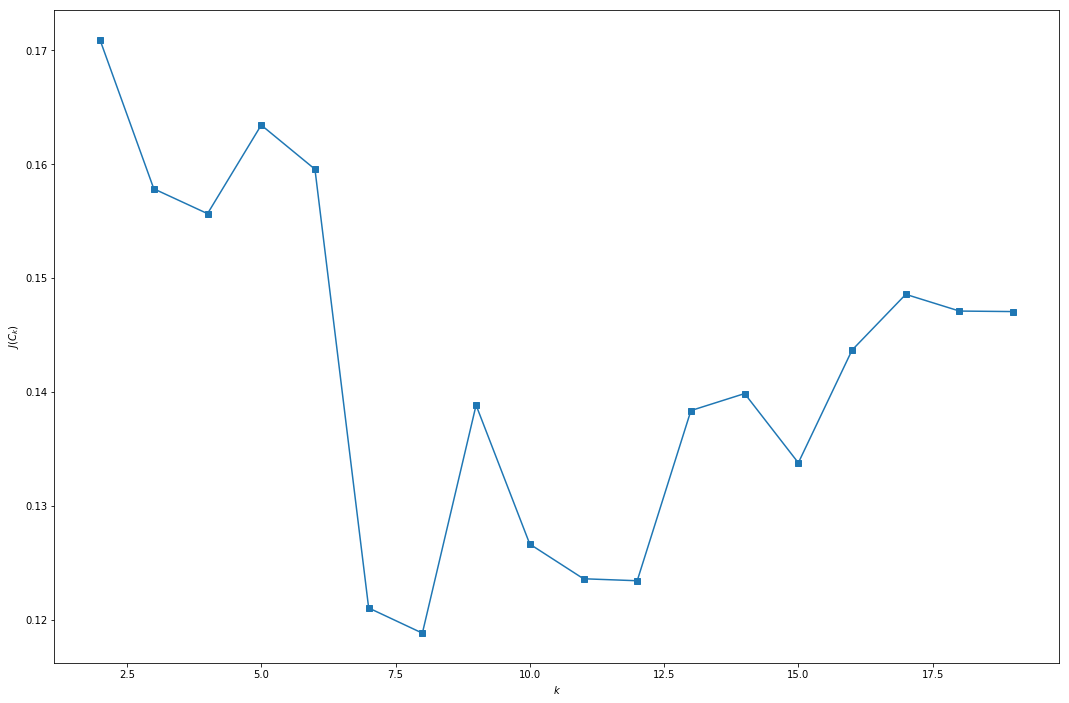

In [7]:
%%time
now = datetime.datetime.now()
print(now)
X1 = pd.DataFrame(X) #.sample(100000)

# с процентами новых и ОСН
from sklearn.metrics import silhouette_score
mas = []
mas1 = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=1,n_jobs=-1).fit(X1)
    labels = kmeans.predict(X1)
    #a1= silhouette_samples_memory_saving(X1, kmeans.labels_)
    a= silhouette_score(X1, kmeans.labels_)
    mas.append(a)
    #mas1.append(a1)
    print(a)

plt.plot(range(2, 20), mas, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');
# Оптимальное количество кластеров, для 1 %   кластера 3 bkb 5

Wall time: 10.1 s


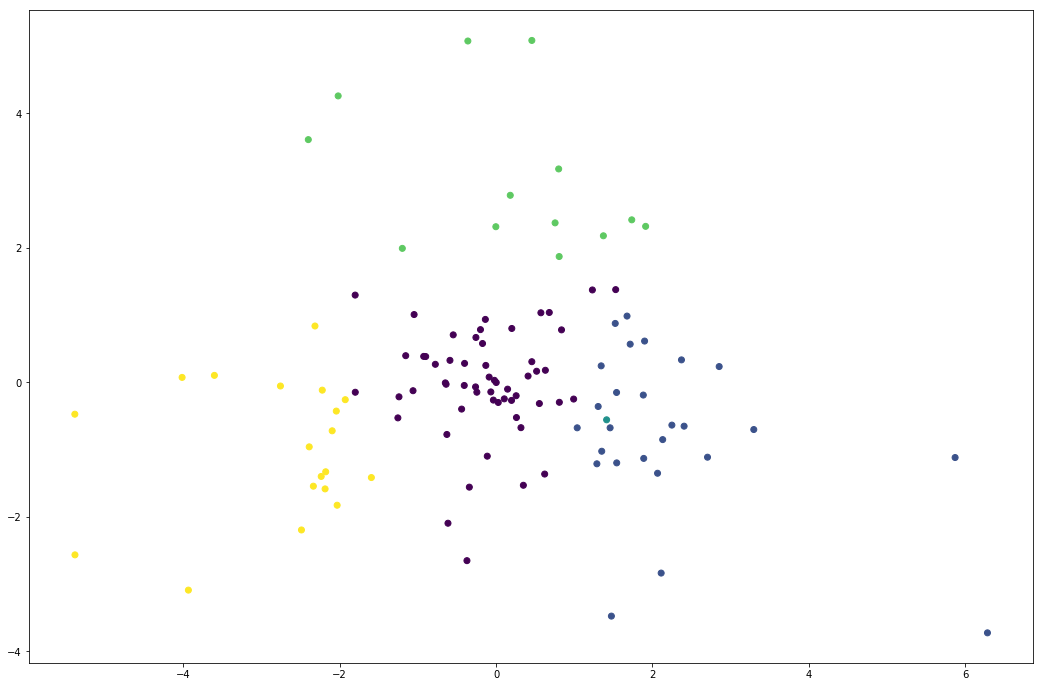

In [15]:
%%time
#Для 1%, где больше 10 покупок
kmeans = KMeans(n_clusters= 5, random_state=1,n_jobs=-1).fit(X)
labels = kmeans.predict(X)
data['labels']=pd.DataFrame(labels)

targert2 = pd.DataFrame(targert2,columns=('X','Y'))
targert2['L'] = pd.DataFrame(labels)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 12

plt.scatter(targert2['X'], targert2['Y'],c =labels)

In [17]:
df = data

In [18]:
data

,CityID,QNT,AVGSUM,SUMSUM,AVGWeightGross,SUMWeightGross,PoSMS,Percen,Zoloto,Serebro,Sergi,Kolco,Podves,CEP,BRASLET,labels
0,3,293,3421.5802,1.002523e+06,2.661160,779.720,0.000000,NaN,0.515358,0.361775,0.249147,0.266212,0.211604,0.112628,0.068259,0
1,108,518,3454.0275,1.789186e+06,2.478459,1283.842,0.000000,NaN,0.571429,0.295367,0.206564,0.247104,0.142857,0.171815,0.088803,1
2,85,609,3103.0623,1.889765e+06,2.630702,1602.098,0.000000,NaN,0.484401,0.364532,0.183908,0.256158,0.174056,0.129721,0.090312,0
3,125,449,4233.9198,1.901030e+06,2.421158,1087.100,0.000000,NaN,0.728285,0.167038,0.175947,0.273942,0.193764,0.133630,0.095768,1
4,52,824,3771.8316,3.107989e+06,2.703760,2227.899,0.000000,NaN,0.466019,0.423544,0.214806,0.275485,0.180825,0.134709,0.066748,3
5,82,1430,3421.0611,4.892117e+06,2.130087,3046.025,0.000000,NaN,0.474825,0.235664,0.237063,0.205594,0.170629,0.096503,0.062238,0
6,126,1981,3586.5526,7.345260e+06,1.881528,3853.370,0.233216,0.323745,0.788574,0.067383,0.201660,0.321289,0.145020,0.125977,0.050781,1
7,116,3514,2342.4925,8.348643e+06,2.742902,9775.706,0.105578,0.328706,0.367003,0.530303,0.189675,0.262626,0.167228,0.195567,0.065376,3
8,103,2550,3259.9651,8.397670e+06,2.781473,7165.076,0.062745,0.341000,0.497283,0.386646,0.226708,0.246118,0.137422,0.180512,0.070652,3
9,56,3606,2419.7409,8.744944e+06,2.889372,10442.194,0.076262,0.392545,0.370504,0.513835,0.219148,0.255119,0.171278,0.148589,0.066132,3


In [19]:
print(df.shape[0])
print(df[df['labels']==0].shape[0],df[df['labels']==0].shape[0]/df.shape[0])
print(df[df['labels']==1].shape[0],df[df['labels']==1].shape[0]/df.shape[0])
print(df[df['labels']==2].shape[0],df[df['labels']==2].shape[0]/df.shape[0])
print(df[df['labels']==3].shape[0],df[df['labels']==3].shape[0]/df.shape[0])
print(df[df['labels']==4].shape[0],df[df['labels']==4].shape[0]/df.shape[0])

115
56 0.48695652173913045
26 0.22608695652173913
1 0.008695652173913044
13 0.11304347826086956
19 0.16521739130434782


In [20]:
pd.concat([df[df['labels']==0].describe().T['mean'], \
           df[df['labels']==1].describe().T['mean'], \
           df[df['labels']==2].describe().T['mean'], \
           df[df['labels']==3].describe().T['mean'], \
           df[df['labels']==4].describe().T['mean'], \
           ],axis=1).to_csv('City 5-cl.csv')

In [21]:
data.to_csv('Describe City 5-cl.csv')